In [ ]:
import numpy

In [ ]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display

from numpy import genfromtxt


hop_length = 256
frame_length = 1024
plt.rcParams['figure.figsize'] = (13, 5)

In [2]:
import numpy, scipy, os, matplotlib, imageio
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import scale
from scipy.spatial import distance
from scipy.interpolate import splprep, splev
from numpy import linspace


import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import scipy.signal as sg

basefile = '/home/tejaswik/Documents/CurrentProjects/melmot/'
def ups(array):
    y = sg.resample(array,600)
    y = pd.DataFrame(y)
    return(y)

def readpitch(stri):
    fil = basefile+'sound/pitch/'+stri
    z = pd.read_csv(fil, sep='   ', engine = 'python',header =0)
    return(z)

In [3]:
pitches = []
for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(ups(readpitch(strings)['F0_Hz']))

    
pitch = pd.DataFrame(pitches)
pitch.columns = ['f0']

In [4]:
def calcContEn(sound):
    fil = sound
    x, sr = librosa.load(fil)
    energy = numpy.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    rmse = librosa.feature.rmse(x)[0]
    return{'En':energy,'RMS':rmse}

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [5]:
def upsample(arr,t):
    tckp1,u1 = splprep([t,arr],s=1.0,k=5,nest = -1)
    xnew1,ynew1 = splev(linspace(0,1,600),tckp1)
    plt.plot(ynew1)
    return ynew1

In [6]:
files = basefile + 'sound/music/'
sounds = os.listdir(files)

In [7]:
a = []
for i in sounds:
    x, sr = librosa.load(files+i)
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    a.append(normalize(spectral_centroids))

/usr/local/lib/python2.7/dist-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/usr/local/lib/python2.7/dist-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):


In [8]:
for i in a:
    print len(i)

259
258
259
259
131
195
258
259
67
129
195
258
129
129
258
193
129
258
131
255
259
129
259
193
131
259
195
131
65
193
131
258


In [9]:
a = []
for i in sounds:
    x, sr = librosa.load(files+i)
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    a.append(normalize(spectral_centroids))

In [10]:
b = []
for i in sounds:
    b.append(calcContEn(files+i)['RMS'])

600

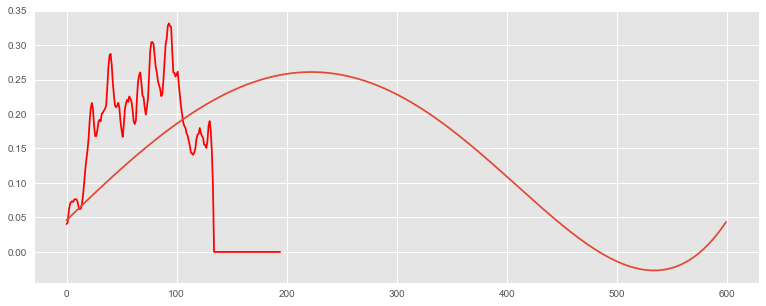

In [11]:
len(b[5])
t = range(0,len(b[5]))
plt.plot(b[5],color = 'red')
e  = upsample(b[5],t)
len(e)

In [12]:
for i in range(0,32):
    sounds[i] = int(sounds[i][:-4])

In [13]:
sounds = sorted(sounds)

In [14]:
for i in range(0,16):
    sounds[i] = str(sounds[i])+'.mp3'
for i in range(16,32):
    sounds[i] = str(sounds[i])+'.wav'

In [15]:
sounds

['1.mp3',
 '2.mp3',
 '3.mp3',
 '4.mp3',
 '5.mp3',
 '6.mp3',
 '7.mp3',
 '8.mp3',
 '9.mp3',
 '10.mp3',
 '11.mp3',
 '12.mp3',
 '13.mp3',
 '14.mp3',
 '15.mp3',
 '16.mp3',
 '17.wav',
 '18.wav',
 '19.wav',
 '20.wav',
 '21.wav',
 '22.wav',
 '23.wav',
 '24.wav',
 '25.wav',
 '26.wav',
 '27.wav',
 '28.wav',
 '29.wav',
 '30.wav',
 '31.wav',
 '32.wav']

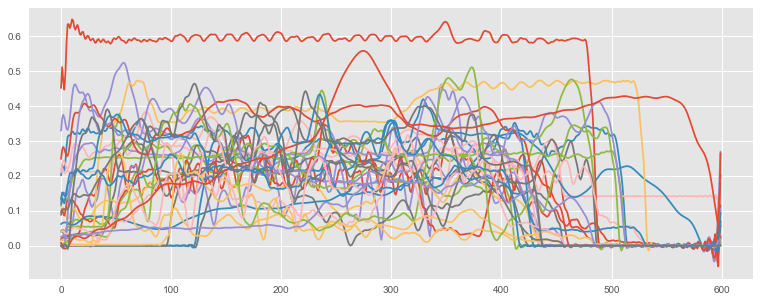

In [16]:
for i in b:
    plt.plot(ups(i))

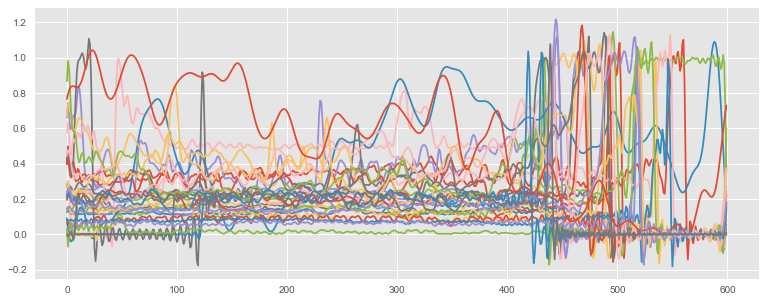

In [17]:
for i in a:
    plt.plot(ups(i))

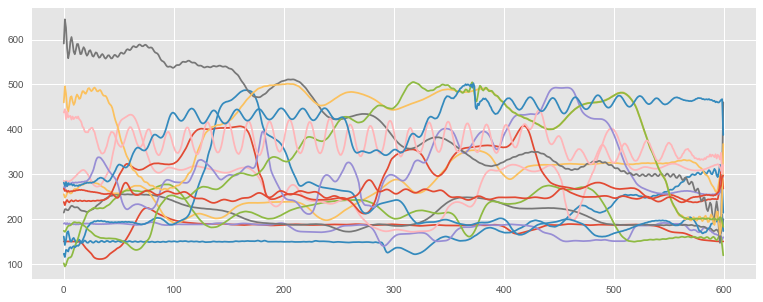

In [18]:
for i in pitches:
    plt.plot(i)

In [52]:
pitchAr = np.array(len(pitches))
for i in range(len(pitches)):
    pitchAr[i]= np.asarray(pitches[i].T)

IndexError: too many indices for array

In [65]:
pitchDf = []
for i in range(len(pitches)):
    pitchDf.append(np.asarray(pitches[i]).T)

In [68]:
np.save('./pitches',pitchDf)

In [69]:
pwd

u'/home/tejaswik/Documents/CurrentProjects/melmot'

In [19]:
g = []
for i in range(0,16):
    print i
    g.append([pitches[i],ups(a[i]),ups(b[i])])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [20]:
melodies = pd.read_csv('cca/melodies794')

In [21]:
melodies['0']

0      11
1       7
2       9
3       1
4      11
5       3
6      10
7       8
8       7
9      10
10     16
11      8
12     11
13     10
14      6
15     13
16     12
17      4
18     16
19     14
20      8
21      8
22      6
23     11
24      9
25     15
26      3
27     14
28      1
29     16
       ..
764    11
765     3
766    11
767    14
768     9
769    13
770     9
771     8
772     5
773     2
774    12
775     8
776    16
777    14
778    15
779    16
780    14
781     8
782     9
783    10
784     9
785     9
786     7
787    16
788    10
789    13
790     4
791    15
792     8
793     3
Name: 0, Length: 794, dtype: int64

In [29]:
labels = numpy.array(melodies['0'])
numpy.save('melodiesLabels',labels, allow_pickle = True)

In [30]:
o = []
for i in range(0,794):
    j = melodies['0'][i] -1
    p = pitches[j][0].values.tolist()
    sc = ups(a[j])[0].values.tolist()
    rms = ups(b[j])[0].values.tolist()
    n = [p,sc,rms]
    g = pd.DataFrame(n)
    g = numpy.array(g.T)
    o.append(g)

In [31]:
o = numpy.array(o)

In [32]:
o.shape

(794, 600, 3)

In [33]:
numpy.save('melodiesFeatures',o, allow_pickle = True)

In [34]:
o[1].shape

(600, 3)

NameError: name 'melodiesLabels' is not defined

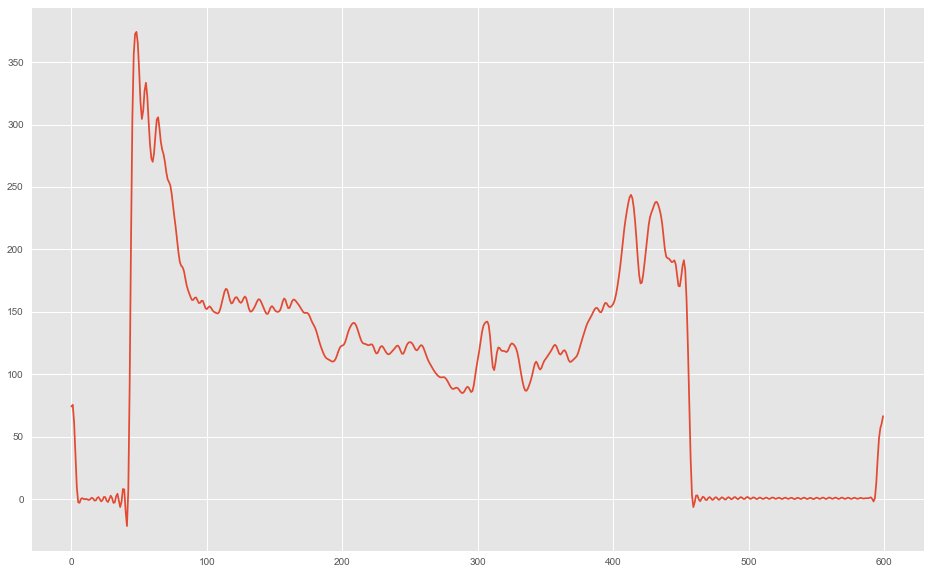

In [35]:
import random
# val = [a*b for a,b in zip(p,rms)]

for i in range(20):
    num = random.randint(1, 700)
    val = o[num,:,0]*o[num,:,1] 
    f,ax = plt.subplots(figsize = (16,10))
    ax = plt.plot(val)
    f.suptitle(melodiesLabels[num], fontsize=14, fontweight='bold')

In [36]:
pureAsc = [2, 5, 12, 13, 16]
pureDes = [11, 9]
vibrato = [14, 15]
motifRepeat = [3, 4, 6, 7, 8, 10]
steady = [1]
categoryLabels = []
for i in melodies['0']:
    if int(i) in pureAsc:
        categoryLabels.append(0)
    elif int(i) in pureDes:
        categoryLabels.append(1)
    elif int(i) in vibrato:
        categoryLabels.append(2)
    elif int(i) in motifRepeat:
        categoryLabels.append(3)
    elif int(i) in steady: 
        categoryLabels.append(4)

In [37]:
im = [1,2,3,4]
jo = [5,6,7,8]
sc = [9,10,11,12]
vo = [13,14,15,16]
IJSV = []
for i in melodies['0']:
    if int(i) in im:
        IJSV.append(0)
    elif int(i) in jo:
        IJSV.append(1)
    elif int(i) in sc:
        IJSV.append(2)
    elif int(i) in vo:
        IJSV.append(3)

IJSV = numpy.array(IJSV)
numpy.save('IJSV',IJSV,allow_pickle=True)

In [38]:
a = [2,5,12,13,16]
d = [11,9]
s = [1,14,15]
c = [3,4,6,7,8,10]
ADSC = []
for i in melodies['0']:
    if int(i) in a:
        ADSC.append(0)
    elif int(i) in d:
        ADSC.append(1)
    elif int(i) in s:
        ADSC.append(2)
    elif int(i) in c:
        ADSC.append(3)
        
ADSC = numpy.array(ADSC)
numpy.save('ADSC',ADSC,allow_pickle=True)

In [39]:
motifRepeat = [3, 4, 6, 7, 8, 10]
motifNonMotif = []
for i in melodies['0']:
    if int(i) in motifRepeat:
        motifNonMotif.append(0)
    else:
        motifNonMotif.append(1)
        
motifNonMotif = numpy.array(motifNonMotif)
numpy.save('motifNonMotif',motifNonMotif,allow_pickle=True)

In [40]:
vib = [13,14,15,16,2]
vibNonVib = []
for i in melodies['0']:
    if int(i) in vib:
        vibNonVib.append(0)
    else:
        vibNonVib.append(1)
        
vibNonVib = numpy.array(vibNonVib)
numpy.save('vibNonVib',vibNonVib,allow_pickle=True)

In [41]:
melodiesLabels = numpy.load('melodiesLabels.npy')

In [42]:
categoryLabels = numpy.array(categoryLabels)
numpy.save('categoryLabels',categoryLabels,allow_pickle=True)

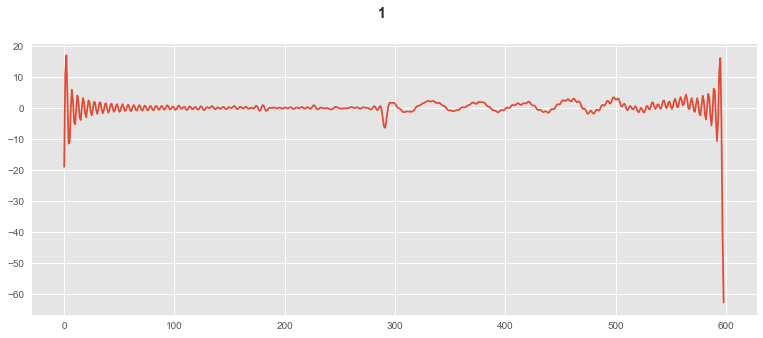

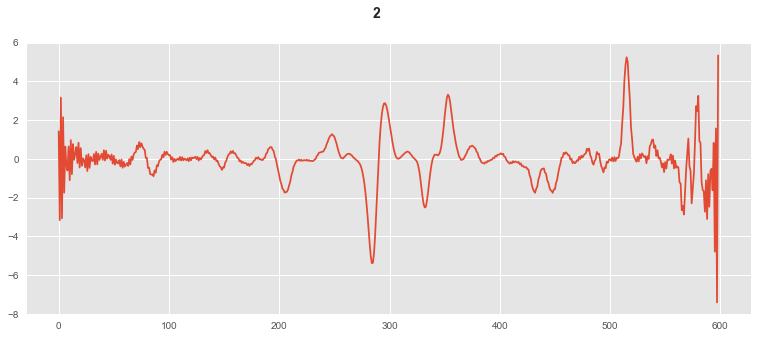

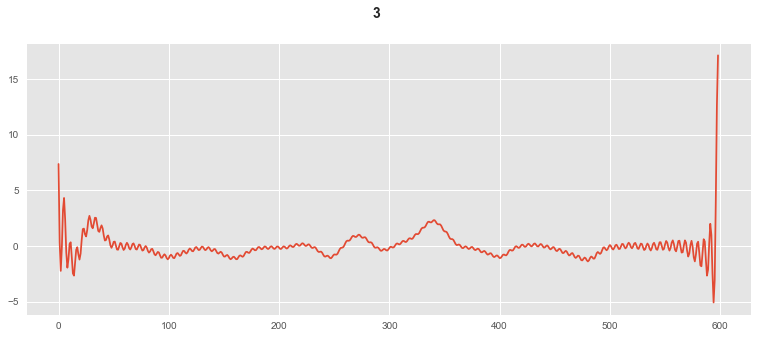

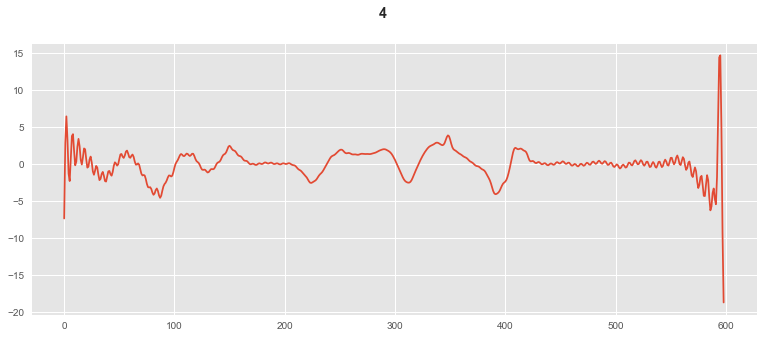

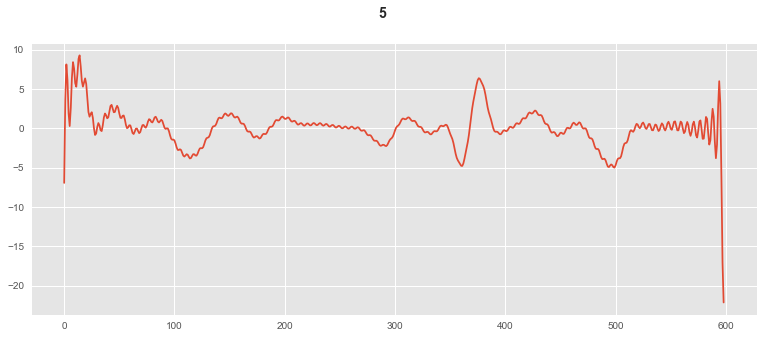

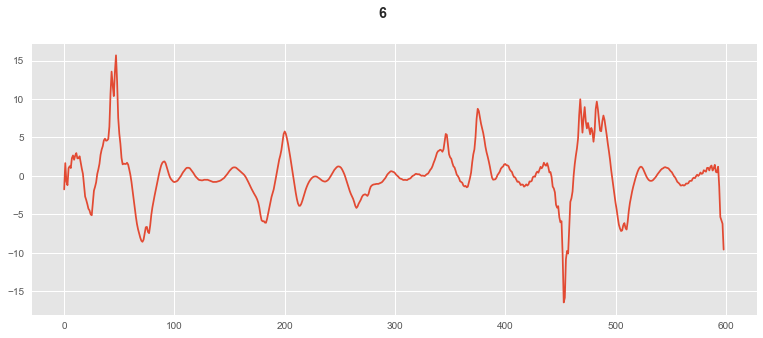

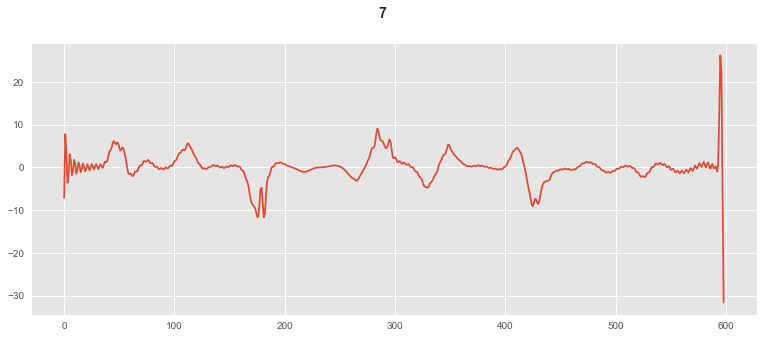

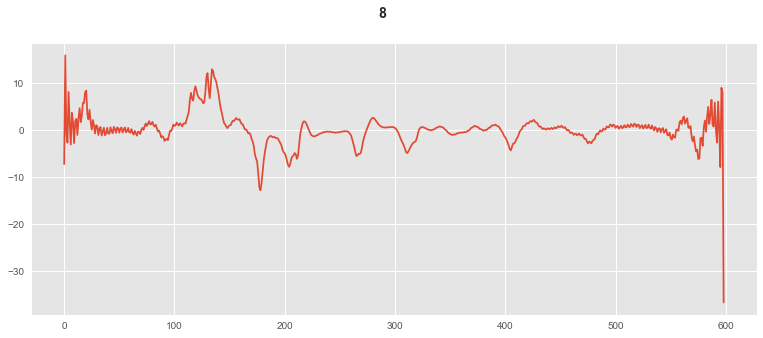

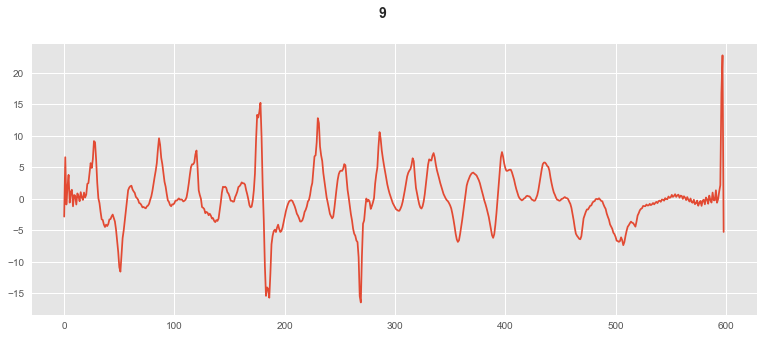

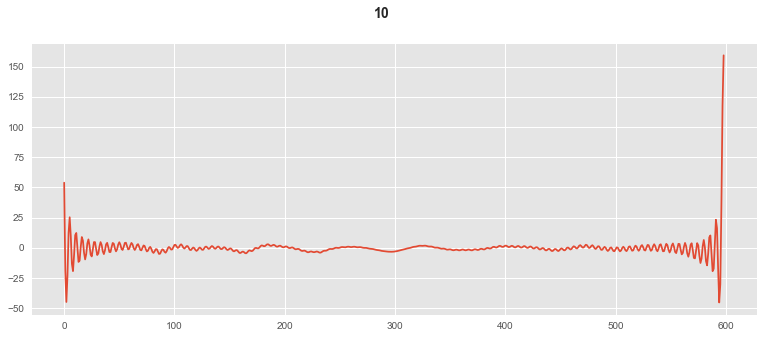

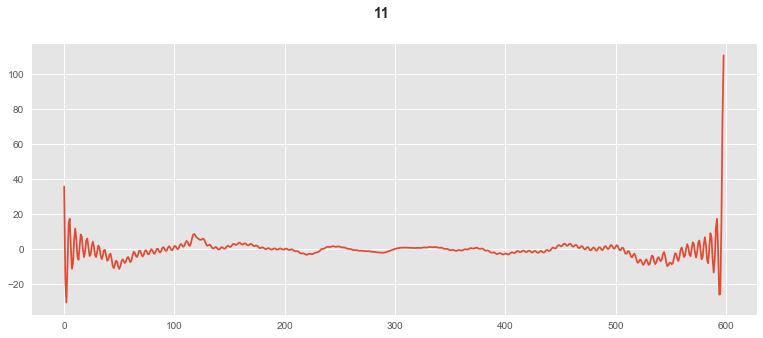

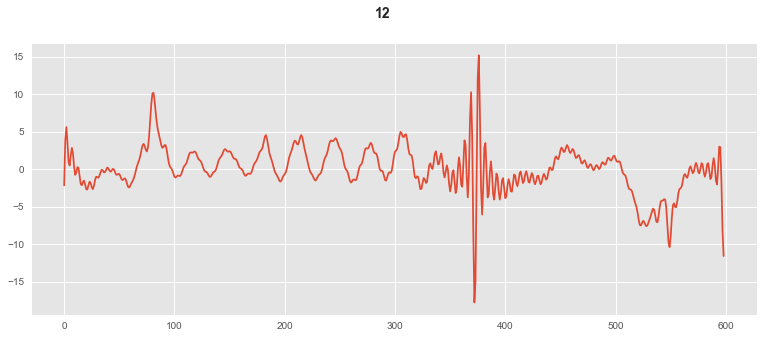

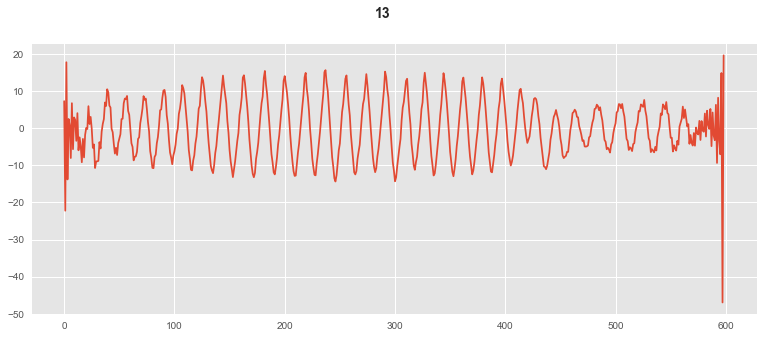

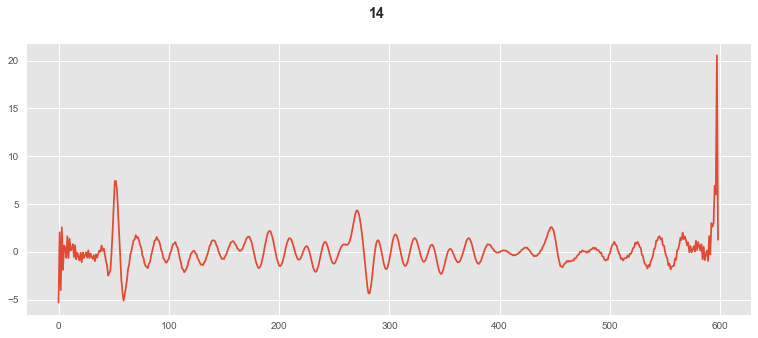

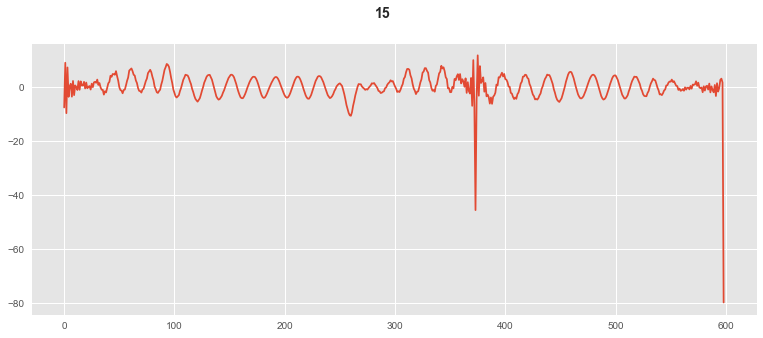

In [68]:
for i in range(1,16):
    f,a = plt.subplots()
    a = plt.plot(numpy.diff(pitches[i][0]))
    f.suptitle(i, fontsize=14, fontweight='bold')

In [69]:
brightnesses = []
for i in range(0,32,1):
    brightnesses.append(numpy.mean(a[i]))

TypeError: unsupported operand type(s) for /: 'Line2D' and 'int'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

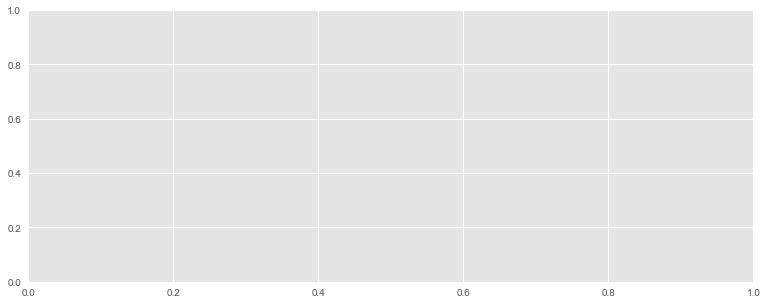

In [66]:
plt.bar(range(1,33),brightnesses)

In [64]:
av = []
for i in range(0,32,4):
    av.append(numpy.mean(brightnesses[i:i+4]))

<Container object of 8 artists>

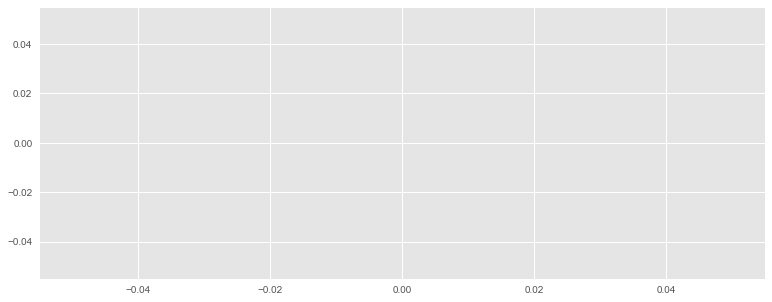

In [65]:
plt.bar(range(1,9),av)

In [47]:
loudnesses = []
for i in range(0,32,1):
    loudnesses.append(numpy.mean(b[i]))

<Container object of 32 artists>

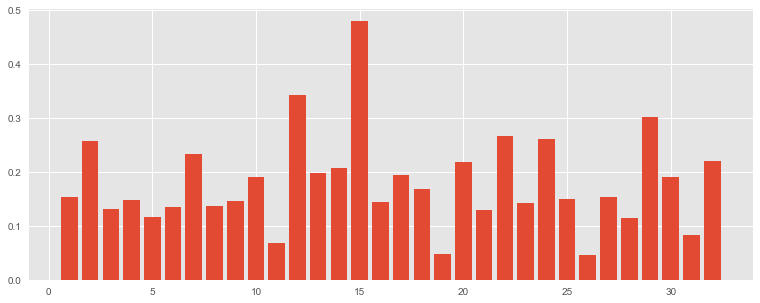

In [48]:
plt.bar(range(1,33),loudnesses)

In [49]:
lv = []
for i in range(0,32,4):
    lv.append(numpy.mean(loudnesses[i:i+4]))

Text(0.5,1,u'Energy and Brightness for each genre')

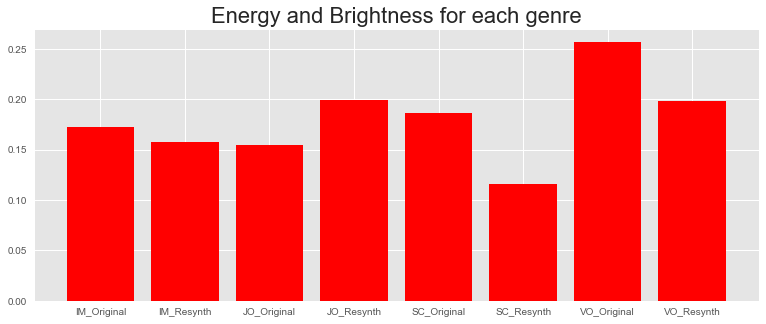

In [50]:
lab = ['IM_Original','JO_Original','SC_Original','VO_Original','IM_Resynth','JO_Resynth','SC_Resynth','VO_Resynth']

plt.bar(lab,av,color = 'blue')
plt.bar(lab,lv,color = 'red')
plt.title('Energy and Brightness for each genre',fontsize = 22)

In [51]:
av2 = [av[0]+av[4],av[1]+av[5],av[2]+av[6],av[3]+av[7]]
lv2 = [lv[0]+lv[4],lv[1]+lv[5],lv[2]+lv[6],lv[3]+lv[7]]

In [63]:
notes = os.listdir('/home/tejaswik/Documents/CurrentProjects/melmot/notes/')
notesnum = []
for i in notes:
    one = genfromtxt('./notes/'+i, delimiter=',')
    notesnum.append(one.shape[0])

In [62]:
notesPerGenre = []
for i in range(0,16,4):
    notesPerGenre.append(numpy.mean(notesnum[i:i+4]))

In [61]:
pitchPerGenre = []
for i in range(0,16,4):
    pitchPerGenre.append(numpy.mean(pitches[i:i+4][0]))
pitchPerGenre = [pitchPerGenre[0][0],pitchPerGenre[1][0],pitchPerGenre[2][0],pitchPerGenre[3][0]]    

In [60]:
from sklearn.preprocessing import scale
X = scale(av2, axis=0, with_mean=True, with_std=True, copy=True )
av2 = X

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

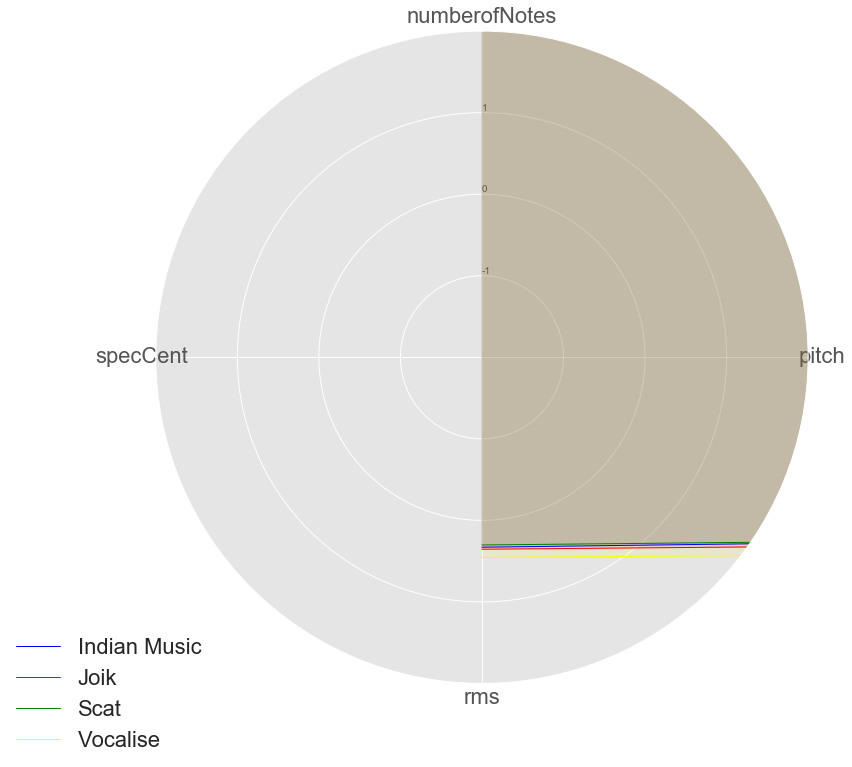

In [70]:
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['im','jo','sc','vo'],
'pitch': pitchPerGenre,
'rms': lv2,
'specCent': av2,
'numberofNotes': notesPerGenre,
# 'mfcc': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, fontsize = 22)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,0,1], ["-1",'0',"1"], color="grey", size=10, fontsize = 22)
plt.ylim(-2,2)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Indian Music",color = 'blue')
ax.fill(angles, values, 'b', alpha=0.1, color = 'blue')
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Joik",color = 'red')
ax.fill(angles, values, 'r', alpha=0.1, color = 'red')
 
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Scat",color = 'green')
ax.fill(angles, values, 'r', alpha=0.1, color = 'green')
 
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Vocalise",color = 'yellow')
ax.fill(angles, values, 'r', alpha=0.1, color = 'yellow')
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize = 22)


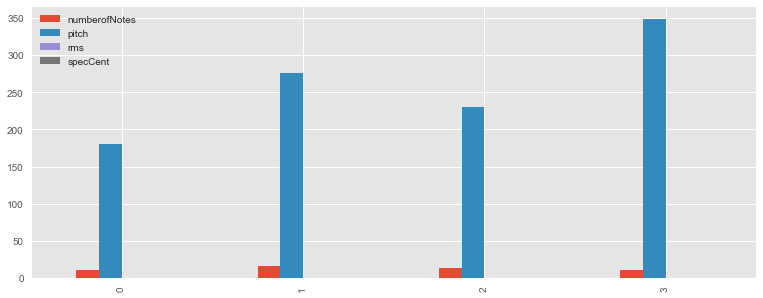

In [57]:
df.plot.bar()